In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle


In [4]:
# checking algorithm from the .py
# file = 'ML-MoS2-532-LP10-2-3-50X.txt'
location = '../data/Green_excitation/'
location = 'Robust PCA/Datasets/'
file = 'liver-norm_3map.txt'

In [5]:
df = pd.read_csv(location + file, delimiter='\t', skipinitialspace=True, header=None, skiprows=[])
wavelength = df.iloc[0].to_numpy()[2:]
data = df.iloc[1:].to_numpy()

X = list(np.unique(data[:,0]))
Y = list(np.unique(data[:,1]))

img = np.empty((len(X), len(Y), len(wavelength)), dtype=np.float64)

for d in data:
    i = X.index(d[0])
    j = Y.index(d[1])
    img[i,j,:] = d[2:]
print(img.shape)

(3, 9, 979)


In [4]:
os.makedirs(f'{location}raw_npy/', exist_ok=True)
np.save(f'{location}raw_npy/{file.split(".")[0]}', img) 

In [5]:
np.save(f'{location}raw_npy/{file.split(".")[0]}_wavelength.npy', wavelength) 

In [6]:
labels = {file.split(".")[0] + ".npy": [0,0,0,0]}

with open(f'{location}Sample_labels.pickle', 'wb') as f:
    pickle.dump(labels, f)

In [10]:
test = img.reshape(27,-1)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['figure.dpi'] = 500

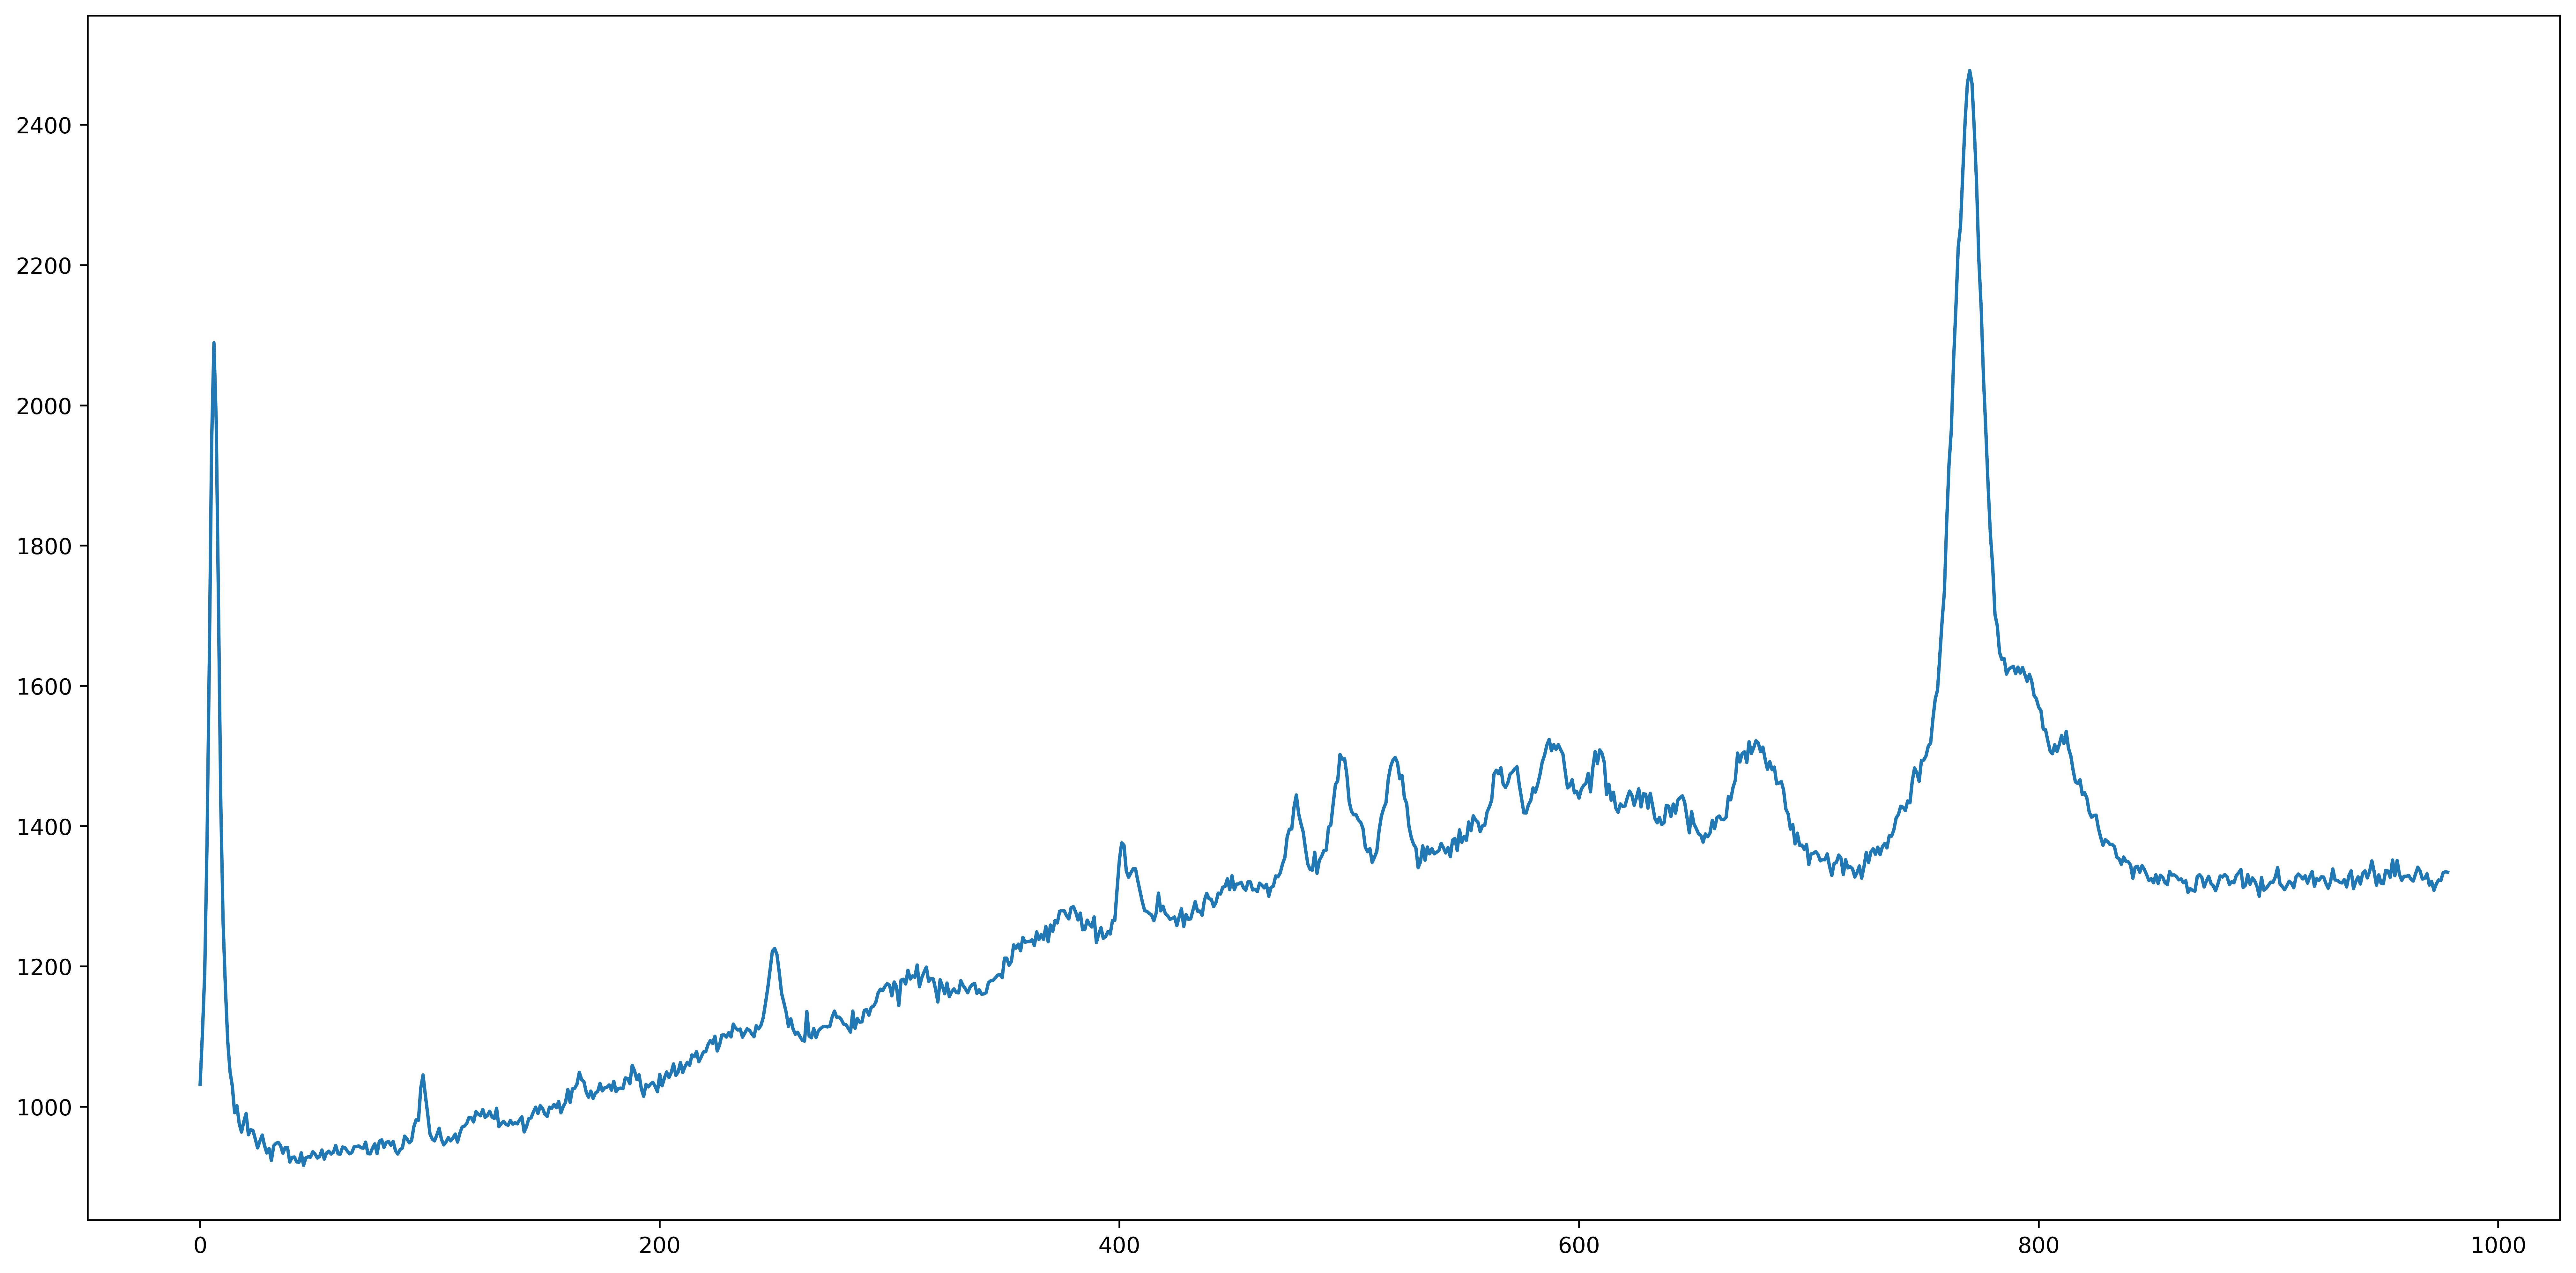

In [11]:
plt.plot(test[0])
